<a href="https://colab.research.google.com/github/vivek-231/homework/blob/main/Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [ ]:
import pandas as pd
from google.colab import files
uploaded  = files.upload()
file_name = list(uploaded.keys())[0]
Cus_seg = pd.read_csv(file_name)

Saving segmentation_data.csv to segmentation_data (1).csv


In [ ]:
Cus_seg.isnull()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
89995,False,False,False,False,False,False,False,False
89996,False,False,False,False,False,False,False,False
89997,False,False,False,False,False,False,False,False
89998,False,False,False,False,False,False,False,False


In [ ]:
Cus_seg.fillna(0,inplace=True)

In [ ]:
Cus_seg

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000000,0,0,27,0,302122,1,1
1,100000001,1,0,45,3,228035,0,0
2,100000002,1,1,37,0,126914,2,2
3,100000003,1,0,75,1,58989,2,0
4,100000004,1,1,75,3,156718,1,2
...,...,...,...,...,...,...,...,...
89995,100089995,0,0,36,2,43672,1,0
89996,100089996,0,1,56,2,74230,2,0
89997,100089997,1,1,39,2,61334,2,1
89998,100089998,0,1,55,2,178610,1,0


In [ ]:
get_standard_values = lambda x: (x-np.mean(x))/np.std(x)

Text(0, 0.5, 'Income')

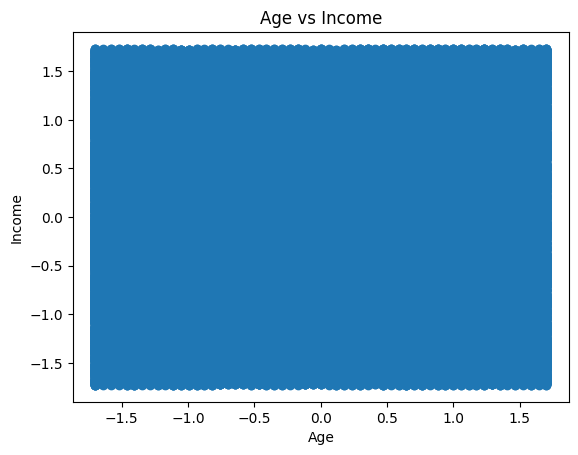

In [ ]:
plt.scatter(get_standard_values(Cus_seg['Age']),get_standard_values(Cus_seg['Income']))
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

Text(0, 0.5, 'Occupation')

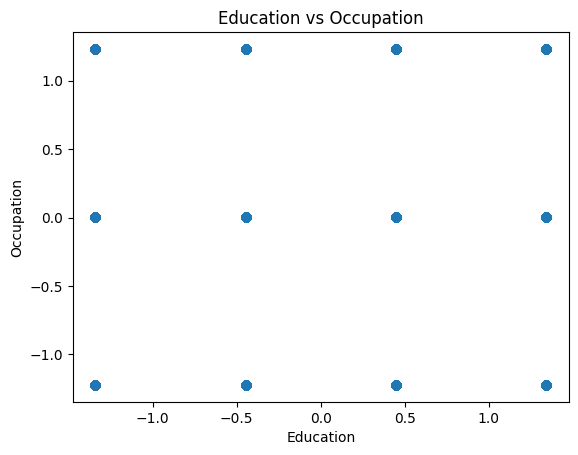

In [ ]:
plt.scatter(get_standard_values(Cus_seg['Education']),get_standard_values(Cus_seg['Occupation']))
plt.title('Education vs Occupation')
plt.xlabel('Education')
plt.ylabel('Occupation')

Text(0, 0.5, 'Occuaption')

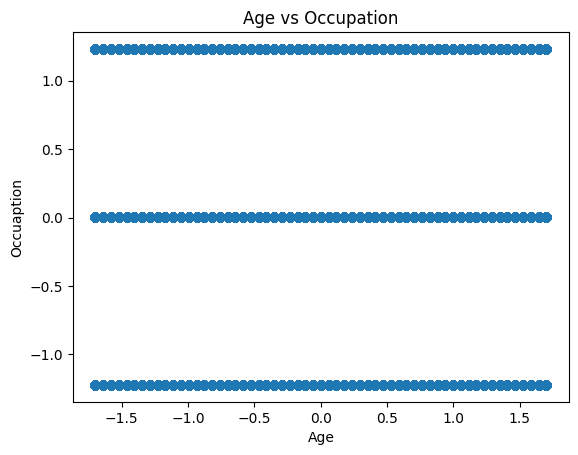

In [ ]:
plt.scatter(get_standard_values(Cus_seg['Age']),get_standard_values(Cus_seg['Occupation']))
plt.title('Age vs Occupation')
plt.xlabel('Age')
plt.ylabel('Occuaption')

Text(0, 0.5, 'Settlement size')

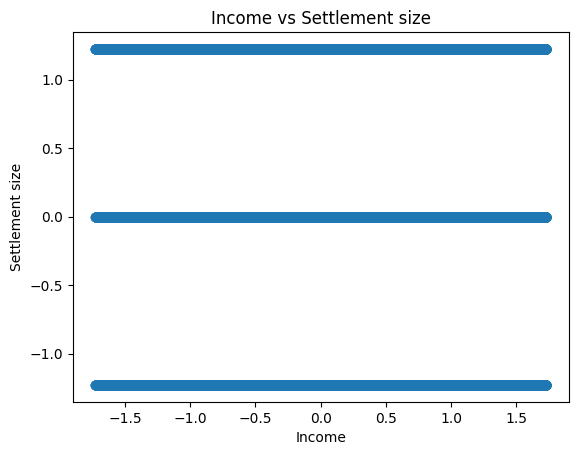

In [ ]:
plt.scatter(get_standard_values(Cus_seg['Income']),get_standard_values(Cus_seg['Settlement size']))
plt.title('Income vs Settlement size')
plt.xlabel('Income')
plt.ylabel('Settlement size')

<Axes: >

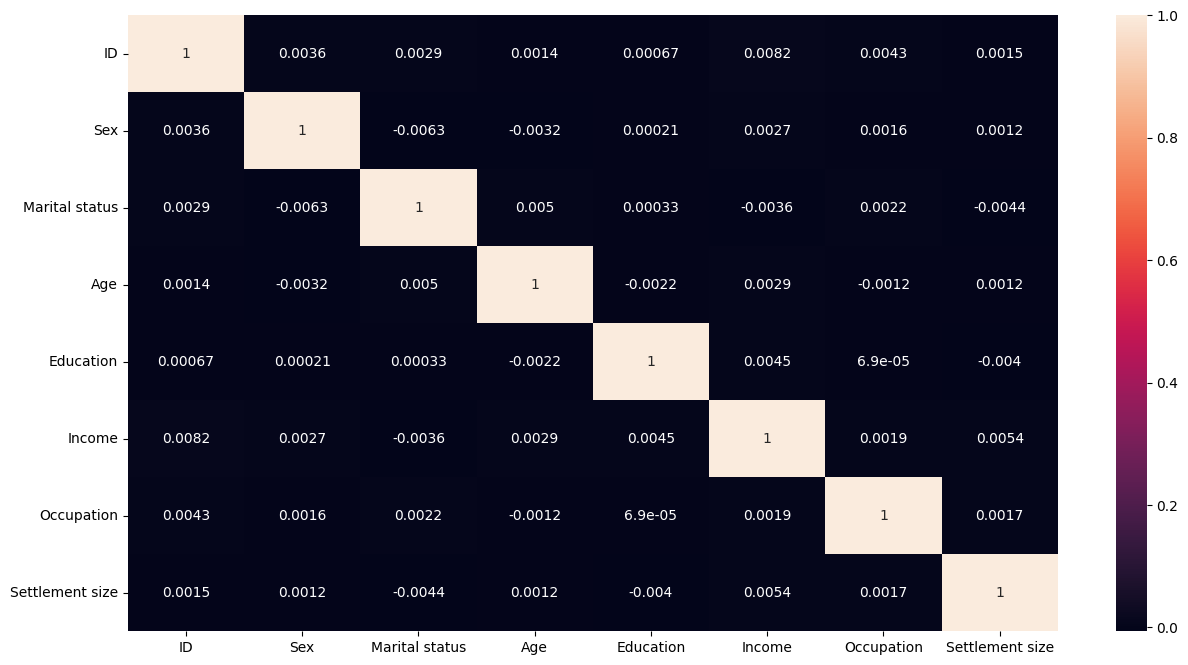

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(Cus_seg.corr(),annot=True)

In [ ]:
Cus_seg.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.003631,0.002863,0.001367,0.000674,0.008180,0.004329,0.001509
Sex,0.003631,1.000000,-0.006291,-0.003218,0.000208,0.002664,0.001553,0.001186
Marital status,0.002863,-0.006291,1.000000,0.005043,0.000330,-0.003627,0.002199,-0.004383
Age,0.001367,-0.003218,0.005043,1.000000,-0.002240,0.002937,-0.001191,0.001166
Education,0.000674,0.000208,0.000330,-0.002240,1.000000,0.004496,0.000069,-0.003987
Income,0.008180,0.002664,-0.003627,0.002937,0.004496,1.000000,0.001898,0.005426
Occupation,0.004329,0.001553,0.002199,-0.001191,0.000069,0.001898,1.000000,0.001664
Settlement size,0.001509,0.001186,-0.004383,0.001166,-0.003987,0.005426,0.001664,1.000000


In [ ]:
import statsmodels.api as sm
model = sm.OLS(Cus_seg['Age'],Cus_seg['Income'])
results = model.fit()
(results.rsquared,results.rsquared_adj)

(0.7304427450767168, 0.7304397499628275)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(Cus_seg[['Age','Income']])
y_predicted

array([2, 2, 1, ..., 1, 0, 2], dtype=int32)

In [ ]:
Cus_seg['Predicted_values']=y_predicted
Cus_seg.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Predicted_values
0,100000000,0,0,27,0,302122,1,1,2
1,100000001,1,0,45,3,228035,0,0,2
2,100000002,1,1,37,0,126914,2,2,1
3,100000003,1,0,75,1,58989,2,0,1
4,100000004,1,1,75,3,156718,1,2,0


In [ ]:
km.cluster_centers_

array([[4.69135095e+01, 1.73673061e+05],
       [4.69518092e+01, 8.18269636e+04],
       [4.70249124e+01, 2.64390954e+05]])

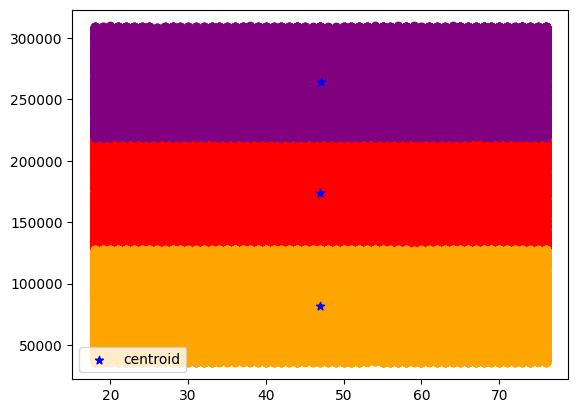

In [ ]:
df1=Cus_seg[Cus_seg.Predicted_values==0]
df2=Cus_seg[Cus_seg.Predicted_values==1]
df3=Cus_seg[Cus_seg.Predicted_values==2]
plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='Orange')
plt.scatter(df3.Age,df3['Income'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Blue',marker='*',label='centroid')
plt.legend()

In [ ]:
X = Cus_seg.drop(columns=['Settlement size'])
y = Cus_seg['Settlement size']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3373333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.23      0.27      5961
           1       0.34      0.52      0.41      6032
           2       0.33      0.27      0.29      6007

    accuracy                           0.34     18000
   macro avg       0.34      0.34      0.33     18000
weighted avg       0.34      0.34      0.33     18000

Confusion Matrix:
 [[1353 2958 1650]
 [1351 3126 1555]
 [1360 3054 1593]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
Cus_seg['settlement_size'] = label_enc.fit_transform(Cus_seg['Settlement size'])


In [ ]:
array=Cus_seg.values
X=array[:,0:5]
Y=array[:,5]

In [ ]:
X
Y

array([302122, 228035, 126914, ...,  61334, 178610, 299329])

In [ ]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X_scaled, y)


In [ ]:
X_new

array([[-0.99156887, -1.33983214,  1.63849395,  0.00428039,  1.23092592],
       [-0.99156887,  1.34163965,  0.70224307, -1.22258363,  1.23092592],
       [ 1.00850281, -1.33983214, -0.57564139,  1.23114441,  0.00207539],
       ...,
       [ 1.00850281,  0.44781572, -1.40438776,  1.23114441,  0.00207539],
       [ 1.00850281,  0.44781572,  0.07765036,  0.00428039, -1.22677514],
       [ 1.00850281,  0.44781572,  1.6031983 ,  0.00428039,  1.23092592]])

In [ ]:
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
Cus_seg['Age_Group'] = pd.cut(Cus_seg['Age'], bins=[0, 18, 35, 50, 100], labels=['Teen', 'Young', 'Middle-Aged', 'Senior'])
Cus_seg['Income_per_Age'] = Cus_seg['Income'] / Cus_seg['Age']


In [ ]:
Cus_seg

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Predicted_values,settlement_size,Age_Group,Income_per_Age
0,100000000,0,0,27,0,302122,1,1,2,1,Young,11189.703704
1,100000001,1,0,45,3,228035,0,0,2,0,Middle-Aged,5067.444444
2,100000002,1,1,37,0,126914,2,2,1,2,Middle-Aged,3430.108108
3,100000003,1,0,75,1,58989,2,0,1,0,Senior,786.520000
4,100000004,1,1,75,3,156718,1,2,0,2,Senior,2089.573333
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,100089995,0,0,36,2,43672,1,0,1,0,Middle-Aged,1213.111111
89996,100089996,0,1,56,2,74230,2,0,1,0,Senior,1325.535714
89997,100089997,1,1,39,2,61334,2,1,1,1,Middle-Aged,1572.666667
89998,100089998,0,1,55,2,178610,1,0,0,0,Senior,3247.454545
